## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import operator
from numpy import linalg as la
from copy import deepcopy

from sklearn.model_selection import train_test_split

from sklearn.metrics.cluster import contingency_matrix
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering


## Read Data from file

In [2]:
df = pd.read_csv('data1.csv')


In [4]:
# df = df[0:2000]
df.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [5]:
# df.head()

In [6]:
df.shape
df_label=df.iloc[:,-1]
df.drop(df.columns[[-1,]], axis=1, inplace=True)
df.shape

(24998, 29)

In [7]:
# df.drop(df['dst'])
# df_label

In [8]:
# train.head().shape

In [9]:
x,y= np.unique(df_label,return_counts =True)
print(x)
print(y)

['dos' 'normal' 'probe' 'r2l' 'u2r']
[ 9114 13364  2313   197    10]


In [10]:
mean=np.mean(df)
print(mean)
std_dev=np.std(df)
df=(df-np.mean(df,axis=0))/np.std(df,axis=0)
# df.shape
df.head()

duration                         310.648452
service                           32.024842
src_bytes                      24424.087767
dst_bytes                       3305.596648
hot                                0.193535
num_failed_logins                  0.001200
num_compromised                    0.229418
num_root                           0.251700
num_file_creations                 0.014841
num_access_files                   0.004360
count                             84.466757
srv_count                         27.767061
serror_rate                        0.284812
srv_serror_rate                    0.282262
rerror_rate                        0.119152
srv_rerror_rate                    0.120744
same_srv_rate                      0.661691
diff_srv_rate                      0.062590
srv_diff_host_rate                 0.096546
dst_host_count                   182.405832
dst_host_srv_count               115.254580
dst_host_same_srv_rate             0.520648
dst_host_diff_srv_rate          

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.114538,-0.425936,-0.010013,-0.034507,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.690213,1.262872,1.067572,-0.441083,-0.253425,0.071030,-0.639500,-0.535332,-0.386077,-0.374982
1,-0.114538,0.362291,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,0.732947,-1.032512,-1.159545,-0.069609,-0.479722,-0.289006,-0.639500,-0.625146,2.878240,2.771138
2,-0.114538,-0.425936,-0.010023,0.077316,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.447897,1.262872,1.067572,-0.441083,-0.382738,0.251048,-0.639500,-0.625146,-0.386077,-0.374982
3,-0.114538,-0.729101,-0.009539,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-0.488729,-0.761404,-0.647308,-0.228812,0.263823,-0.289006,-0.594507,-0.625146,-0.386077,-0.374982
4,-0.114538,0.301658,-0.010092,-0.039819,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,0.732947,-0.815626,-0.936833,-0.175745,-0.479722,-0.289006,1.610108,1.620205,-0.386077,-0.374982


## Class to put Weight and Bias between Layers

In [11]:
class Wgt_n_Bias:
    def __init__(self, current_layer_nodes,next_layer_nodes, activation_function):
        #nodes in current layer
        self.current_layer_nodes = current_layer_nodes
        #nodes in next layer
        self.next_layer_nodes = next_layer_nodes
        #activation_function 
        self.activation_function = activation_function
        #activations
        self.activations = np.zeros([current_layer_nodes,1])
        
        # putting weights and bias for layers
        
        # if not output layer set random weights and bias
        if next_layer_nodes != 0:
            self.weights = np.random.normal(0, 0.001, size=(current_layer_nodes, next_layer_nodes))
            self.bias = np.random.normal(0, 0.001, size=(1, next_layer_nodes))
        # if output layer set weight and bias to None
        else:
            self.weights = None
            self.bias = None

## Functions 

In [12]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def tanh(x):
    return np.tanh(x)

def relu(x):
    x[x < 0] = 0
    return x

def tanh_der(x):
    return 1.0 - np.tanh(x)**2

def relu_der(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def linear(x):
    return x

def derlinear(x):
    return 1

## Class to  make Neural Nertwork

In [22]:
class Neu_net:
    def __init__(self, layers, node_list, activation_function):
        self.layers = layers
        self.node_list = node_list
        self.layer_list = []
        self.error = 0
        self.learning_rate = 0.0001
        self.cost_function = "mean_squared"

        for i in range(layers):
            
            if i != layers-1:
                layer_i = Wgt_n_Bias(node_list[i], node_list[i+1], activation_function[i])
            else:
                #if i is output layer
                layer_i = Wgt_n_Bias(node_list[i], 0, activation_function[i])
            self.layer_list.append(layer_i)
                   

    def forward_propagation(self, inputs):
        self.layer_list[0].activations = inputs
        for i in range(self.layers-1):
            
            temp = np.add(np.matmul(self.layer_list[i].activations, self.layer_list[i].weights), self.layer_list[i].bias)

            if self.layer_list[i+1].activation_function == "sigmoid":
                self.layer_list[i+1].activations = sigmoid(temp)
            elif self.layer_list[i+1].activation_function == "softmax":
                self.layer_list[i+1].activations = softmax(temp)
            elif self.layer_list[i+1].activation_function == "relu":
                self.layer_list[i+1].activations = relu(temp)
            elif self.layer_list[i+1].activation_function == "tanh":
                self.layer_list[i+1].activations = tanh(temp)
            elif self.layer_list[i+1].activation_function == "linear":
                self.layer_list[i+1].activations = linear(temp)
            else:
                self.layer_list[i+1].activations = temp
    
    #Error func - mean-squared
    def Error_func(self,label_vector):
            #self.error = np.sum(-label_vector * np.log(self.layer_list[-1].activations))
        self.error = np.mean(np.divide(np.square(np.subtract(label_vector, self.layer_list[self.layers-1].activations)), 2))
    
    def back_propagation(self,label_vector):
        
        #for the weight and bias of output layer
        i = self.layers-1
        diff_a_z=0
        
        #
        if self.layer_list[i].activation_function == "sigmoid":
            diff_e_z=self.layer_list[i].activations*(1-self.layer_list[i].activations)*(self.layer_list[i].activations-label_vector)
        else:
            diff_e_z=self.layer_list[i].activations-label_vector
        #diff_e_z=self.layer_list[i].activations-label_vector
        diff_z_w=self.layer_list[i-1].activations
        diff_e_w=np.dot(diff_z_w.T, diff_e_z) 
        diff_e_b=diff_e_z

        self.layer_list[i-1].weights -= self.learning_rate * diff_e_w
        self.layer_list[i-1].bias -= self.learning_rate * diff_e_b.sum(axis=0)
       
        for i in range(i-1,0,-1):
            diff_z_a=self.layer_list[i].weights
            diff_e_a=np.dot(diff_e_z,diff_z_a.T)
            
            temp = np.add(np.matmul(self.layer_list[i-1].activations, self.layer_list[i-1].weights), self.layer_list[i-1].bias)

            if self.layer_list[i].activation_function == "sigmoid":
                diff_a_z=sigmoid_der(temp)
            if self.layer_list[i].activation_function == "relu":
                diff_a_z=relu_der(temp)
            if self.layer_list[i].activation_function == "tanh":
                diff_a_z=tanh_der(temp)
            if self.layer_list[i].activation_function == "linear":
                diff_a_z=derlinear(temp)

            diff_z_w=self.layer_list[i-1].activations
            diff_e_w=np.dot(diff_z_w.T,(diff_a_z*diff_e_a))
            diff_e_b = diff_e_a*diff_a_z
            diff_e_z=diff_e_b
    
            self.layer_list[i-1].weights -= self.learning_rate * diff_e_w
            self.layer_list[i-1].bias -= self.learning_rate * diff_e_b.sum(axis=0)
                         

## Training Neural Network

In [23]:
def Training_Network(inputs, num_epochs):
    nn.error = 0
    for j in range(num_epochs): 
        nn.forward_propagation(inputs)
        nn.Error_func(inputs)
        print("Iter "+str(j)+" : "+str(nn.error))
        nn.back_propagation(inputs)

In [24]:
# nn=Neu_net(layers=3, [l1,l2,l3], [None,"f2","f3"])
nn=Neu_net(3, [29,14,29], [None,"sigmoid","sigmoid"])
# nn=Neu_net(5, [29,21,14,21,29], [None,"linear","linear","linear","linear"])

In [25]:
Training_Network(df.values,100)

Iter 0 : 0.6249493678410067
Iter 1 : 0.5086131778104498
Iter 2 : 0.4997648702153988
Iter 3 : 0.49619089245498477
Iter 4 : 0.4937527270046982
Iter 5 : 0.49169949912308536
Iter 6 : 0.4897927379207087
Iter 7 : 0.48794632251042297
Iter 8 : 0.48613492489158094
Iter 9 : 0.48435989811022495
Iter 10 : 0.48263128046985815
Iter 11 : 0.4809553606055476
Iter 12 : 0.4793242065571895
Iter 13 : 0.4777043399425359
Iter 14 : 0.4760203554671776
Iter 15 : 0.47412668279349957
Iter 16 : 0.47175594199592547
Iter 17 : 0.46843093091977933
Iter 18 : 0.46341550945407367
Iter 19 : 0.4562950614160412
Iter 20 : 0.44863790630093975
Iter 21 : 0.44261278310643004
Iter 22 : 0.43830948866235386
Iter 23 : 0.4351309012016586
Iter 24 : 0.43264115248063406
Iter 25 : 0.4305517919098725
Iter 26 : 0.42864733795172205
Iter 27 : 0.4268846967954651
Iter 28 : 0.42541031694396986
Iter 29 : 0.42416607133852774
Iter 30 : 0.42307953123342157
Iter 31 : 0.4221122676538864
Iter 32 : 0.4212346651972599
Iter 33 : 0.42042210379485956
Iter 

## Weight & Bias: Saving and Retrieving by file

In [26]:
for i in range(nn.layers):
    np.save('wgts'+str(i)+'.npy',nn.layer_list[i].weights)
    np.save('bias'+str(i)+'.npy',nn.layer_list[i].bias)

In [27]:
for i in range(nn.layers):
    nn.layer_list[i].weights = np.load('wgts'+str(i)+'.npy')
    nn.layer_list[i].bias=np.load('bias'+str(i)+'.npy')

## Testing data-Calculating Accuracy

In [28]:
# nn.forward_propagation(validate.values)

In [30]:
ans=nn.layer_list[1].activations
dimensions=ans

In [31]:
ans.shape

(24998, 14)

In [32]:
ans

array([[6.19850289e-01, 9.72411609e-01, 6.63479304e-01, ...,
        9.82882515e-01, 9.77682910e-01, 8.31728293e-01],
       [1.75686292e-02, 8.23941508e-04, 1.78153796e-02, ...,
        9.69569432e-01, 5.55978553e-04, 1.10977051e-02],
       [7.13117652e-01, 9.69223411e-01, 7.43352854e-01, ...,
        9.86308875e-01, 9.71798384e-01, 8.61312149e-01],
       ...,
       [3.45697014e-03, 5.25111868e-03, 3.30886161e-03, ...,
        2.43494813e-03, 2.33586829e-04, 4.13953284e-03],
       [2.09497351e-03, 9.95492751e-01, 1.75953042e-03, ...,
        9.89997751e-01, 9.98363801e-01, 3.37972777e-03],
       [9.94616708e-01, 9.53529858e-02, 9.93441536e-01, ...,
        9.67026346e-03, 2.03125755e-01, 9.83099729e-01]])

## K-Means func

In [33]:
def k_means(k,dimensions) :
    rows = dimensions.shape[0]
    cols = dimensions.shape[1]
    
    mn = np.mean(dimensions, axis = 0)
    #print(mn)
    std = np.std(dimensions, axis = 0)
    #print(std)
    centers = np.random.randn(k,cols)*std + mn
    #print(centers)
#     plt.scatter(centers[:,0], centers[:,1], marker='+', c='r', s=150)
    
    # to store old centers
    co = np.zeros(centers.shape)
    # to Store new centers
    cn = deepcopy(centers) 

    clusters = np.zeros(rows)
    distances = np.zeros((rows,k))

    error = np.linalg.norm(cn - co)

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(dimensions - cn[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        co = deepcopy(cn)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            cn[i] = np.mean(dimensions[clusters == i], axis=0)
        error = np.linalg.norm(cn - co)
    # centers_new   
#     plt.scatter(cn[:,0], cn[:,1], marker='+', c='g', s=150)
#     print(clusters)
#     print(np.unique(clusters))
    
    #
    cmat=contingency_matrix(clusters,lclass)
#     print(cmat)

    for i,item in enumerate(cmat):
        print("Purity of clusters :",i," :", max(item)*100/sum(item))
    
    pure=0
    for row in cmat:
#         print(max(row))
        pure+=max(row)
    purity0=pure/len(df_label)
    
    return purity0
    

## GMM Func

In [34]:
def GMM_fun(dimensions) :
    
    GMM=GaussianMixture(n_components=5).fit(dimensions)
    gmmlabel=GMM.predict(dimensions)
    
    np.unique(gmmlabel)
    cmat=contingency_matrix(gmmlabel,lclass)

    for i,item in enumerate(cmat):
        print("Purity of clusters :",i," :", max(item)*100/sum(item))

    pure1=0
    for i in cmat:
        pure1+=max(i)
    #     print(max(i))
    purity1=pure1/len(df_label)
    print('GMM Purity:', purity1)
    
    return purity1

## Hierrarchial Func

In [35]:
def hierarchial_cluster(dimensions) :
    cc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
    aclabel=cc.fit_predict(dimensions)
    np.unique(aclabel)
    
    cmat2=contingency_matrix(aclabel,lclass)
    
    for i,item in enumerate(cmat2):
        print("Purity of clusters :",i," :", max(item)*100/sum(item))

    pure2=0
    for i in cmat2:
        pure2+=max(i)
    purity2=pure2/len(df_label)
    print('Hierarchical Purity:', purity2)
    
    return purity2
 

In [36]:
#converting unique vals of label [xAttack] attr into integer categories
uv = np.unique(df_label)
# print(uv)
cat = [0,1,2,3,4]
#converted label data into int class list 
lclass=[]
for i in range(len(df_label)):
    if df_label[i]=='dos':
        lclass.append(cat[0])
    if df_label[i]=='normal':
        lclass.append(cat[1])
    if df_label[i]=='probe':
        lclass.append(cat[2])
    if df_label[i]=='r2l':
        lclass.append(cat[3])
    if df_label[i]=='u2r':
        lclass.append(cat[4])
# print(lclass)



In [37]:
# kmeans on reduced dimenasions
k = 5
purity0 = k_means(k,dimensions)
print('K-means Purity is:', purity0)

Purity of clusters : 0  : 98.38009835117154
Purity of clusters : 1  : 69.66993755575379
Purity of clusters : 2  : 96.1617482256257
Purity of clusters : 3  : 44.657356284507955
Purity of clusters : 4  : 51.13350125944584
K-means Purity is: 0.8352268181454516


In [38]:
#GMM_fun
purity1 = GMM_fun(dimensions)

Purity of clusters : 0  : 99.0132468234658
Purity of clusters : 1  : 48.8713722680043
Purity of clusters : 2  : 100.0
Purity of clusters : 3  : 76.34864546525324
Purity of clusters : 4  : 58.31496448689689
GMM Purity: 0.8317465397231778


In [39]:
#Hierarchial clustering
purity2 = hierarchial_cluster(dimensions)

Purity of clusters : 0  : 53.44910371318822
Purity of clusters : 1  : 100.0
Purity of clusters : 2  : 100.0
Purity of clusters : 3  : 100.0
Purity of clusters : 4  : 100.0
Hierarchical Purity: 0.5346027682214577


## PIE Chart

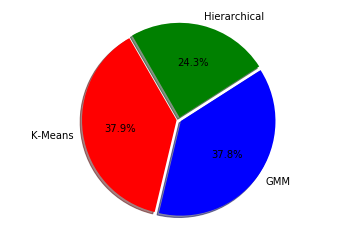

In [41]:
import matplotlib.pyplot as plt
slices_hours = [purity0, purity1, purity2]
activities = ['K-Means', 'GMM', 'Hierarchical']
explode = (0.025, 0.025, 0.025)
colors = ['red', 'blue','green']
fig1, ax1 = plt.subplots()
ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal') 
plt.show()